In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
df_train = pd.read_csv('../input/customer-segmentation-flight/flight_train.csv')
df_test = pd.read_csv('../input/customer-segmentation-flight/flight_test.csv')

In [3]:
df = pd.concat([df_train,df_test])

In [4]:
df.shape

(62988, 23)

In [5]:
df[df.duplicated()==True] # there is no duplication

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62988 entries, 0 to 7987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        6298

In [7]:
columns = [x for x in df.columns]
percent=[]
for col in columns:
    percent.append(round(df[col].isnull().sum()/df[col].shape[0]*100, 2))
    
explore = df.describe(percentiles = [], include = 'all').T 
explore['missing'] = len(df) - explore['count'] 
explore['%'] = percent
explore = explore[['missing','%','min','max']]

In [8]:
explore = explore.replace(np.nan, '-', regex=True)
explore

,missing,%,min,max
MEMBER_NO,0.0,0.00,1.0,62988.0
FFP_DATE,0.0,0.00,-,-
FIRST_FLIGHT_DATE,0.0,0.00,-,-
GENDER,3.0,0.00,-,-
FFP_TIER,0.0,0.00,4.0,6.0
WORK_CITY,2269.0,3.60,-,-
WORK_PROVINCE,3248.0,5.16,-,-
WORK_COUNTRY,26.0,0.04,-,-
AGE,420.0,0.67,6.0,110.0
LOAD_TIME,0.0,0.00,-,-


In [9]:
for i in df.select_dtypes(include=np.number):
    df[i].fillna(df[i].mean(),inplace=True)

In [10]:
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                     0
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1                0
SUM_YR_2                0
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [11]:
df['FFP_DATE']=pd.to_datetime(df['FFP_DATE'])
df['LOAD_TIME']=pd.to_datetime(df['LOAD_TIME'])

In [12]:
from datetime import datetime
def interval_time(dd):
    return dd.days

df['LENGTH']=np.abs(df['LOAD_TIME']-df['FFP_DATE'])
df['LENGTH']=df['LENGTH'].apply(interval_time)

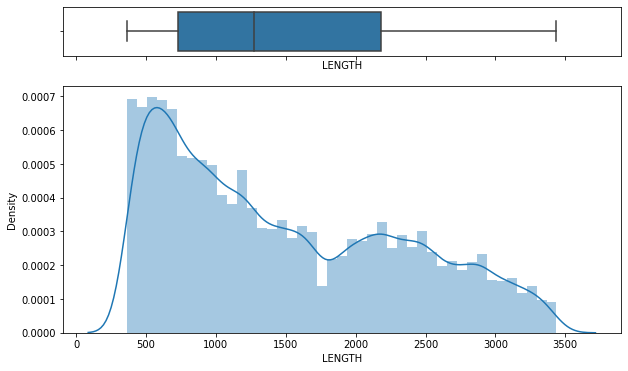

In [13]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))
sns.boxplot(df['LENGTH'], ax=ax_box)
sns.distplot(df['LENGTH'], ax=ax_hist)
plt.show()

In [14]:
df['avg_discount'].describe()

count    62988.000000
mean         0.721558
std          0.185427
min          0.000000
25%          0.611997
50%          0.711856
75%          0.809476
max          1.500000
Name: avg_discount, dtype: float64

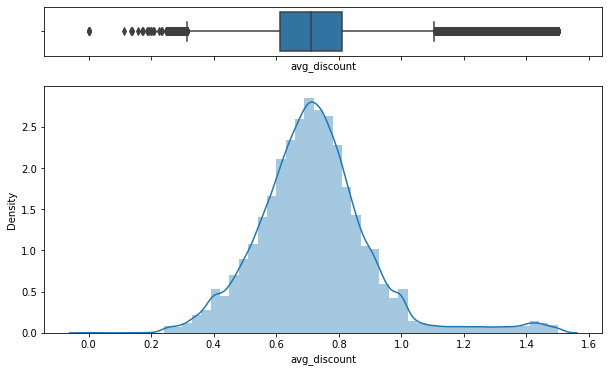

In [15]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))
sns.boxplot(df['avg_discount'], ax=ax_box)
sns.distplot(df['avg_discount'], ax=ax_hist)
plt.show()

In [16]:
df.shape

(62988, 24)

<AxesSubplot:>

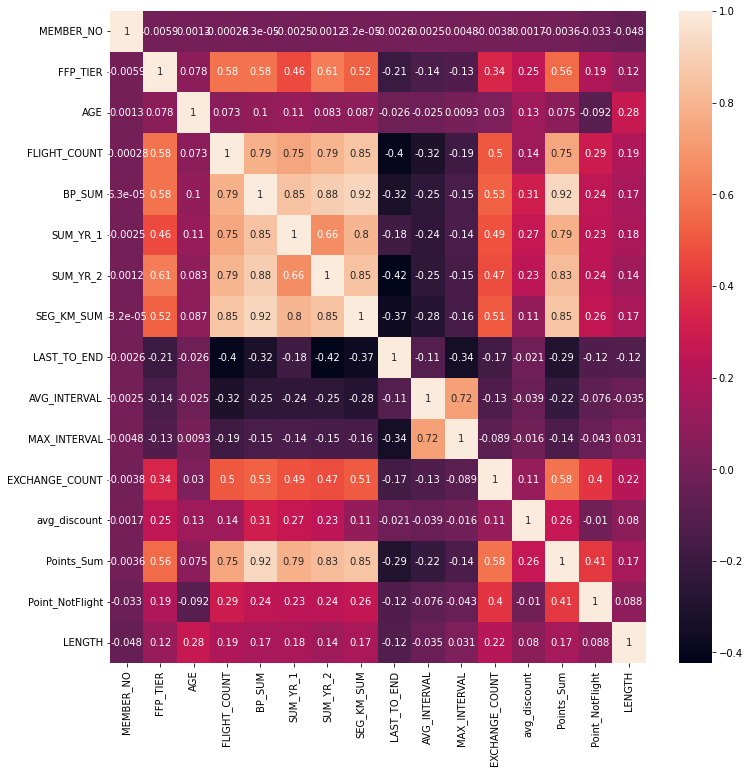

In [17]:
plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [18]:
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                     0
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1                0
SUM_YR_2                0
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
LENGTH                  0
dtype: int64

In [19]:
df['WORK_CITY'].value_counts()

guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3234, dtype: int64

In [20]:
df['WORK_COUNTRY'].value_counts()

CN    57748
HK      991
JP      875
KR      790
US      575
      ...  
CD        1
BI        1
CM        1
FL        1
GL        1
Name: WORK_COUNTRY, Length: 118, dtype: int64

In [21]:
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                     0
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1                0
SUM_YR_2                0
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
LENGTH                  0
dtype: int64

In [22]:
df['WORK_COUNTRY'].fillna('CN',inplace=True) # CN is dominant

In [23]:
df['GENDER'].value_counts()

Male      48134
Female    14851
Name: GENDER, dtype: int64

In [24]:
df['GENDER'].fillna('Male',inplace=True) # only 3 and Male is dominant

In [25]:
df['WORK_PROVINCE'].unique()

array(['beijing', 'CA', 'guizhou', ..., 'NOTARIO', 'TOPKPPI', 'JAWATIMUR'],
      dtype=object)

In [26]:
df['WORK_CITY'].fillna(df['WORK_PROVINCE'],inplace=True)
df['WORK_PROVINCE'].fillna(df['WORK_CITY'],inplace=True)

In [27]:
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  0
FFP_TIER                0
WORK_CITY            1769
WORK_PROVINCE        1769
WORK_COUNTRY            0
AGE                     0
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1                0
SUM_YR_2                0
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
LENGTH                  0
dtype: int64

In [28]:
# df.loc[df['WORK_PROVINCE'] == '.','WORK_PROVINCE'] = df['WORK_CITY']
# df.loc[df['WORK_CITY'] == '.','WORK_CITY'] = df['WORK_PROVINCE']#
# df['WORK_CITY'].fillna('.',inplace=True)

In [29]:
df['WORK_CITY'].fillna('.',inplace=True)
df['WORK_PROVINCE'].fillna('.',inplace=True)

In [30]:
df.shape

(62988, 24)

In [31]:
df = df[df['WORK_CITY'].notnull()]
df = df[df['WORK_PROVINCE'].notnull()]

In [32]:
df['FLIGHT_COUNT'].describe()

count    62988.000000
mean        11.839414
std         14.049471
min          2.000000
25%          3.000000
50%          7.000000
75%         15.000000
max        213.000000
Name: FLIGHT_COUNT, dtype: float64

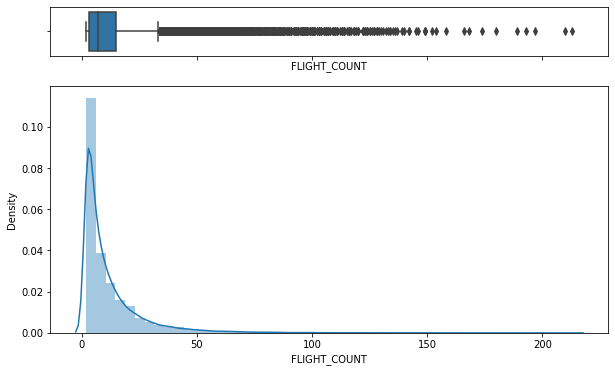

In [33]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))
sns.boxplot(df['FLIGHT_COUNT'], ax=ax_box)
sns.distplot(df['FLIGHT_COUNT'], ax=ax_hist)
plt.show()

In [34]:
df['WORK_CITY'].value_counts()

guangzhou                  9391
beijing                    8093
shanghai                   5076
shenzhen                   3606
.                          2437
                           ... 
ISE                           1
ACTONA MEADOWS                1
fengxianhuanchengdonglu       1
KASUGAI                       1
lingshui                      1
Name: WORK_CITY, Length: 3262, dtype: int64

In [35]:
df.loc[df['WORK_CITY'] == '.']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,LENGTH
0,54993,2006-11-02,12/24/2008,Male,6,.,beijing,CN,31.0,2014-03-31,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50,2706
2,55106,2007-02-01,8/30/2007,Male,6,.,beijing,CN,40.0,2014-03-31,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26,2615
20,21501,2008-07-30,11/21/2008,Male,6,.,beijing,CN,49.0,2014-03-31,106,220641,69566.0,122763.0,167113,3/28/2014,4,6.438095,31,4,1.369404,251134,9,2070
24,58472,2010-02-14,3/1/2010,Female,5,.,.,FR,48.0,2014-03-31,44,204801,38510.0,75816.0,281837,3/15/2014,17,15.883721,66,10,0.787308,235939,12,1506
27,47114,2005-01-15,3/17/2005,Male,6,.,beijing,CN,47.0,2014-03-31,74,209810,101398.0,83139.0,148685,3/21/2014,11,9.493151,51,8,1.433364,235176,14,3362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7944,2096,2005-03-14,3/14/2005,Male,4,.,.,CN,59.0,2014-03-31,2,400,0.0,462.0,928,2/8/2014,53,0.000000,0,0,0.340000,400,0,3304
7950,31906,2011-03-09,9/10/2013,Male,4,.,.,TW,51.0,2014-03-31,2,700,0.0,1260.0,368,9/15/2013,199,5.000000,5,0,0.835000,700,0,1118
7956,2213,2005-05-18,7/19/2005,Female,4,.,.,CN,45.0,2014-03-31,2,0,0.0,422.0,904,1/19/2014,73,41.000000,41,0,0.320000,0,0,3239
7970,38088,2005-03-11,6/16/2005,Female,4,.,.,CN,47.0,2014-03-31,2,0,350.0,0.0,1096,10/11/2012,538,2.000000,2,0,0.250000,0,0,3307


In [36]:
index1=df['WORK_CITY'] !='.'
index2=df['WORK_PROVINCE'] !='.'
df2=df[index1|index2]
df2.shape

(61173, 24)

In [37]:
df.shape

(62988, 24)

In [38]:
df.isnull().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
LENGTH               0
dtype: int64

In [39]:
df_=df.copy()

In [40]:
df_lrfmc=df[['MEMBER_NO','LENGTH','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
df_lrfmc.columns = ['MEMBER_NO','L','R','F','M','C']
df_lrfmc_drop=df_lrfmc[['L','R','F','M','C']]

In [41]:
df_lrfmc_drop.head()

,L,R,F,M,C
0,2706,1,210,580717,0.961639
1,2597,7,140,293678,1.252314
2,2615,11,135,283712,1.254676
3,2047,97,23,281336,1.090870
4,1816,5,152,309928,0.970658


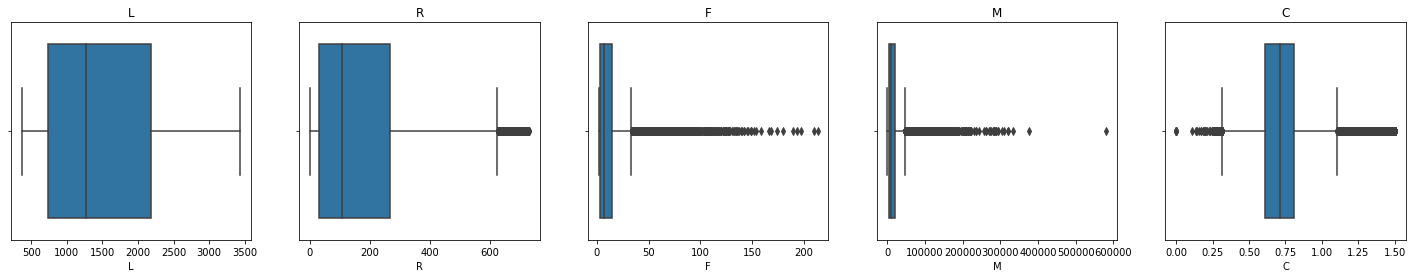

In [42]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        sns.boxplot(df_lrfmc_drop[col])
        plt.title(col)
        i = i+1     
dist_list(LRFM)

In [43]:
rfm_log=df_lrfmc_drop.copy()

In [44]:
cols=['R','F','M','C']
for col in cols:
    high_cut = rfm_log[col].quantile(q=0.99)
    low_cut=rfm_log[col].quantile(q=0.01)
    rfm_log.loc[rfm_log[col]>high_cut,col]=high_cut
    rfm_log.loc[rfm_log[col]<low_cut,col]=low_cut

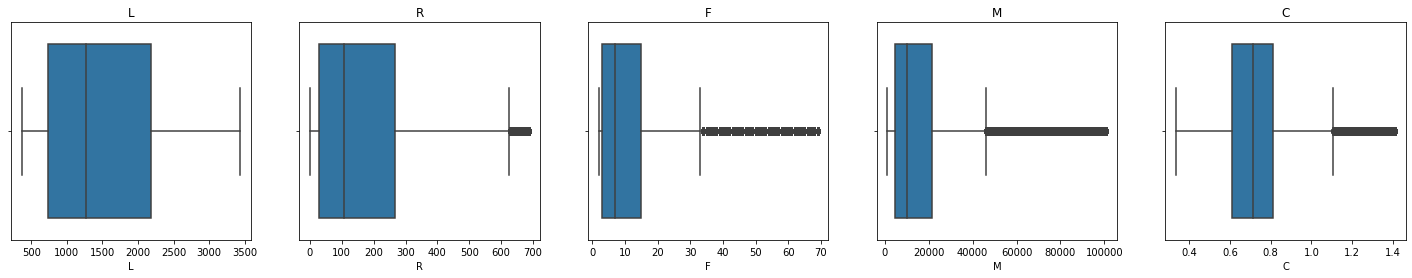

In [45]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        sns.boxplot(rfm_log[col])
        plt.title(col)
        i = i+1
        
dist_list(LRFM)

In [46]:
rfm_log.shape

(62988, 5)

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
df_std=rfm_log
scale = MinMaxScaler()
kolom_all = [x for x in df_std.columns]
for kolom in kolom_all:
  df_std[kolom] = scale.fit_transform(np.array(df_std[kolom]).reshape(-1,1))

In [49]:
df_std.head()

,L,R,F,M,C
0,0.762044,0.000000,1.000000,1.0,0.583012
1,0.726562,0.008746,1.000000,1.0,0.853348
2,0.732422,0.014577,1.000000,1.0,0.855544
3,0.547526,0.139942,0.313433,1.0,0.703200
4,0.472331,0.005831,1.000000,1.0,0.591400


Elbow

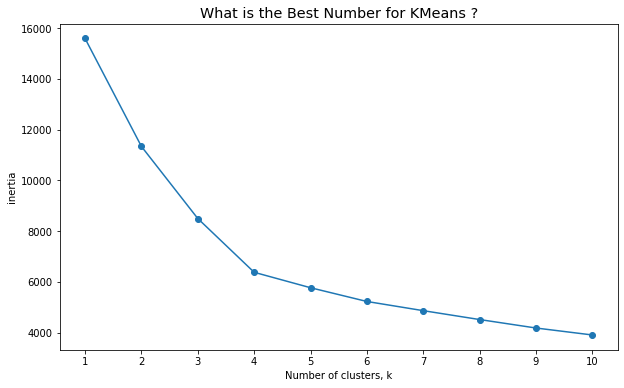

In [50]:
from sklearn.cluster import KMeans
ks = range(1,11)
inertias=[]
for k in ks :
    kc = KMeans(n_clusters=k,random_state=142)
    kc.fit(df_std)
    cluster = kc.fit_predict(df_std)
    inertias.append(kc.inertia_)
# Plot ks vs inertias
f, ax = plt.subplots(figsize=(10, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

Silhoutte to get best number for K Means

In [51]:
from sklearn.metrics import silhouette_score

In [52]:
for n_clusters in range(2,6):
    clusterer = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=300, random_state=142).fit(df_std)
    preds = clusterer.predict(df_std)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(df_std, preds, metric='mahalanobis')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.1837525450141846
For n_clusters = 3. The average silhouette_score is : 0.21399212497266146
For n_clusters = 4. The average silhouette_score is : 0.23624541134941868
For n_clusters = 5. The average silhouette_score is : 0.21164811893485042


In [53]:
kc = KMeans(init='k-means++',n_clusters= 4, random_state=142)
kc.fit(df_std)
cluster_labels = kc.labels_

data_c = df_std.assign(K_Cluster = cluster_labels)
data_label=df_lrfmc.assign(K_Cluster = cluster_labels)

In [54]:
data_f=data_c.groupby('K_Cluster').mean()
data_f['count']=pd.value_counts(data_c['K_Cluster'])

In [55]:
data_f

,L,R,F,M,C,count
K_Cluster,,,,,,
0,0.686553,0.165493,0.117643,0.129448,0.367196,17026
1,0.173794,0.145339,0.110757,0.123556,0.343622,26760
2,0.270881,0.699174,0.028350,0.048863,0.354337,13022
3,0.501135,0.040548,0.601043,0.597678,0.420686,6180


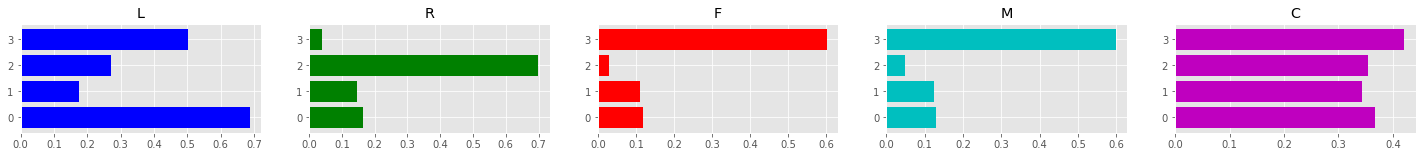

In [56]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,2])
    i = 1
    cl = ['bgrcmykw'[c] for c in range(len('bgrcmykw'))]
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        g = data_c.groupby('K_Cluster')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y,color=cl[i-1])
        plt.title(col)
        i = i+1
        
dist_list(LRFM)

In [57]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=142, covariance_type='full').fit(df_std)
prediction_gmm = gmm.predict(df_std)
probs = gmm.predict_proba(df_std)
data_d=df_std.assign(GMM_Cluster = prediction_gmm)
data_labelg=df_lrfmc.assign(GMM_Cluster = prediction_gmm)

In [58]:
data_g=data_d.groupby('GMM_Cluster').mean()
data_g['count']=pd.value_counts(data_d['GMM_Cluster'])
data_g

,L,R,F,M,C,count
GMM_Cluster,,,,,,
0,0.328507,0.420856,0.019064,0.032900,0.344466,25567
1,0.617898,0.142260,0.137279,0.143353,0.393303,11498
2,0.154515,0.212818,0.126429,0.141083,0.335197,14573
3,0.458953,0.049785,0.453055,0.466507,0.391826,11350


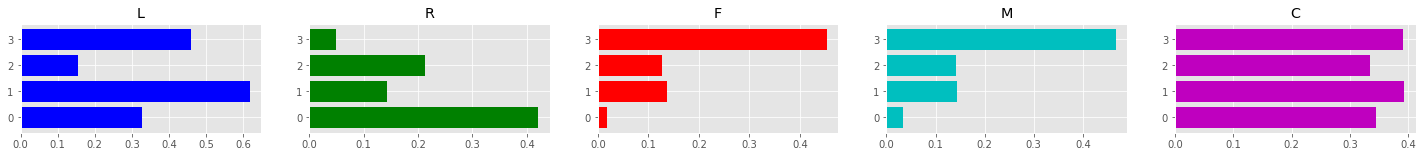

In [59]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,2])
    i = 1
    cl = ['bgrcmykw'[c] for c in range(len('bgrcmykw'))]
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        g = data_d.groupby('GMM_Cluster')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y,color=cl[i-1])
        plt.title(col)
        i = i+1
        
dist_list(LRFM)

In [60]:
x=data_c.drop('K_Cluster', axis=1)

CPU times: user 5.18 s, sys: 1.51 s, total: 6.69 s
Wall time: 1.68 s


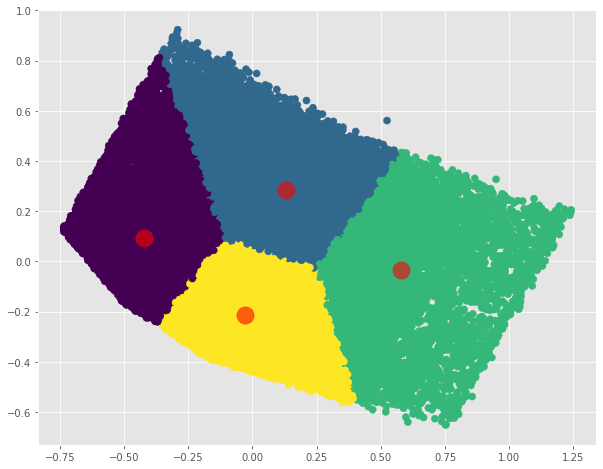

In [61]:
#kmeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
n_clusters = 4
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(df_std)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600,random_state=150, algorithm = 'auto')

%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
df_pred=df.assign(K_Cluster = prediction)
targets = [0, 1, 2,3]
plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='red', s=300, alpha=0.6);

In [62]:
data_labeling=df.assign(K_Cluster = cluster_labels)

In [63]:
cluster = [] 
for i, k in data_labeling.iterrows():
    if k['K_Cluster'] == 0:
        cluster_name = 'Potential'
    elif k['K_Cluster'] == 3:
        cluster_name = 'Loyal'
    elif k['K_Cluster'] == 1:
        cluster_name = 'Important'
    else:
        cluster_name = 'Low Value'
    cluster.append(cluster_name)
    
data_labeling['cluster'] = cluster    
data_label['cluster'] = cluster 

In [64]:
df_me=data_label.groupby(data_label['cluster']).mean()
df_me['count']=pd.value_counts(data_label['cluster'])
df_me

,MEMBER_NO,L,R,F,M,C,K_Cluster,count
cluster,,,,,,,,
Important,32141.842152,898.894694,100.702504,9.420740,13501.490732,0.704081,1.0,26760
Low Value,31558.579558,1197.145293,481.540393,3.899478,6054.123176,0.715339,2.0,13022
Loyal,31349.337864,1904.485599,28.816019,44.435437,64496.903883,0.787684,3.0,6180
Potential,30480.743510,2474.090391,114.527899,9.882063,14088.530542,0.729780,0.0,17026


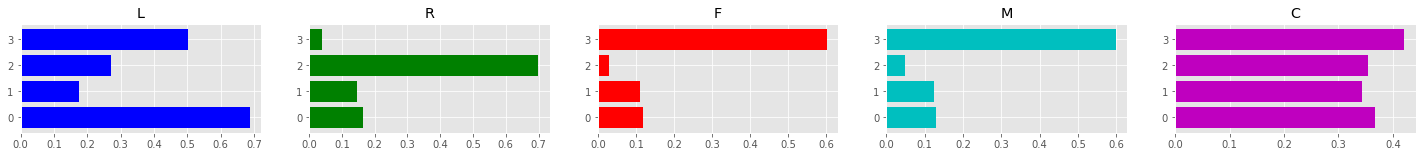

In [65]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,2])
    i = 1
    cl = ['bgrcmykw'[c] for c in range(len('bgrcmykw'))]
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        g = data_c.groupby('K_Cluster')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y,color=cl[i-1])
        plt.title(col)
        i = i+1
        
dist_list(LRFM)

0 = Loyal
1 = General & Low Value
2 = Important
3 = Potential

In [66]:
data_labeling

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,LENGTH,K_Cluster,cluster
0,54993,2006-11-02,12/24/2008,Male,6,.,beijing,CN,31.0,2014-03-31,210,505308,239560.000000,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50,2706,3,Loyal
1,28065,2007-02-19,8/3/2007,Male,6,beijing,beijing,CN,42.0,2014-03-31,140,362480,171483.000000,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33,2597,3,Loyal
2,55106,2007-02-01,8/30/2007,Male,6,.,beijing,CN,40.0,2014-03-31,135,351159,163618.000000,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26,2615,3,Loyal
3,21189,2008-08-22,8/23/2008,Male,5,Los Angeles,CA,US,64.0,2014-03-31,23,337314,116350.000000,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12,2047,3,Loyal
4,39546,2009-04-10,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,152,273844,124560.000000,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39,1816,3,Loyal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7983,18375,2011-05-20,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,2014-03-31,2,0,0.000000,0.0,1134,6/9/2013,297,4.000000,4,1,0.000000,12318,22,1046,2,Low Value
7984,36041,2010-03-08,9/14/2013,Male,4,foshan,guangdong,CN,38.0,2014-03-31,4,0,0.000000,0.0,8016,1/3/2014,89,37.000000,60,14,0.000000,106972,43,1484,1,Important
7985,45690,2006-03-30,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,2014-03-31,2,0,0.000000,0.0,2594,3/3/2014,29,166.000000,166,0,0.000000,0,0,2923,0,Potential
7986,61027,2013-02-06,2/14/2013,Female,4,guangzhou,guangdong,CN,36.0,2014-03-31,2,0,0.000000,0.0,3934,2/26/2013,400,12.000000,12,0,0.000000,0,0,418,2,Low Value


In [67]:
result=pd.DataFrame()
result['MEMBER_NO']=data_labeling['MEMBER_NO']
result['cluster']=data_labeling['cluster']
result.to_csv('kaggle_cluster.csv',index=False)

In [68]:
x=pd.get_dummies(df,drop_first=True)

In [69]:
allscore=[]
allclusters=[]
sum_of_squared_distances = []
preds=[]
def clust(clusters,x):
    for no_of_cluster in np.arange(1,clusters):
        
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(x,pred)
        print ("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
        preds.append(pred)

In [70]:
clust(8,x)

TypeError: invalid type promotion

In [ ]:
plt.plot(allclusters,allscore)
plt.xlabel('Clusters()')
plt.ylabel('Silhoutte_Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

In [ ]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('Clusters()')
plt.ylabel('Silhoutte_Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

In [ ]:
pred=preds[4]

In [ ]:
pred

In [ ]:
result=pd.DataFrame()
result["ID"]=df["ID"]
result["Cluster"]=pred

In [ ]:
len(pred)

In [ ]:
result

In [ ]:
x

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y=x["Age"],x=x["Family_Size"],c=pred)
plt.legend()
plt.colorbar()
plt.show()